In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import date, datetime

In [2]:
start_date = '2014-05-31'
end_date = datetime.today()

In [3]:
df = yf.download('^GSPC',start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-24,5281.450195,5311.649902,5278.390137,5304.720215,5304.720215,3005510000
2024-05-28,5315.910156,5315.910156,5280.890137,5306.040039,5306.040039,3751540000
2024-05-29,5278.729980,5282.270020,5262.700195,5266.950195,5266.950195,3552750000
2024-05-30,5259.770020,5260.209961,5222.100098,5235.479980,5235.479980,3818750000
2024-05-31,5243.209961,5280.330078,5191.680176,5277.509766,5277.509766,5437160000


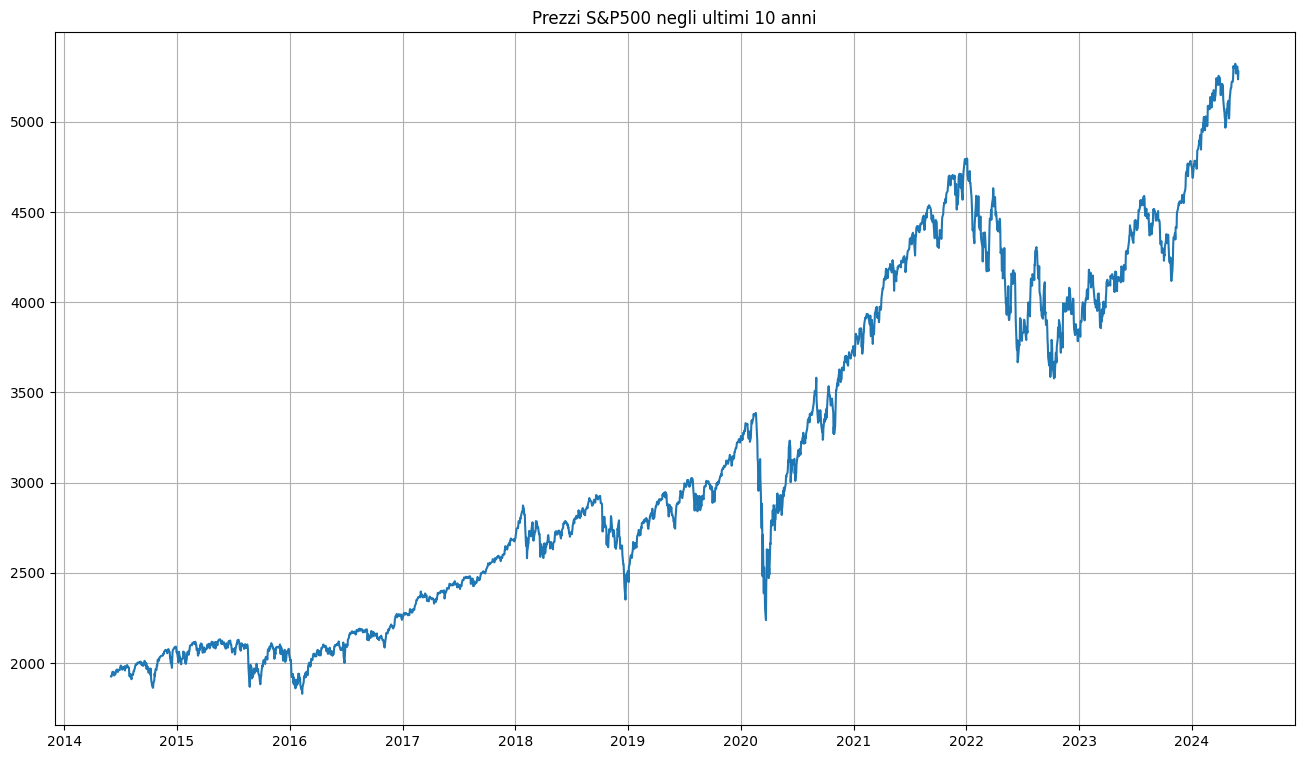

In [18]:
plt.figure(figsize=(16,9))
plt.plot(df.index, df['Adj Close'])
plt.title('Prezzi S&P500 negli ultimi 10 anni')
plt.grid(True)

In [6]:
# train test split
to_row = int(len(df)*0.9)
training_data = list(df[0:to_row]['Adj Close'])
testing_data = list(df[to_row:]['Adj Close'])

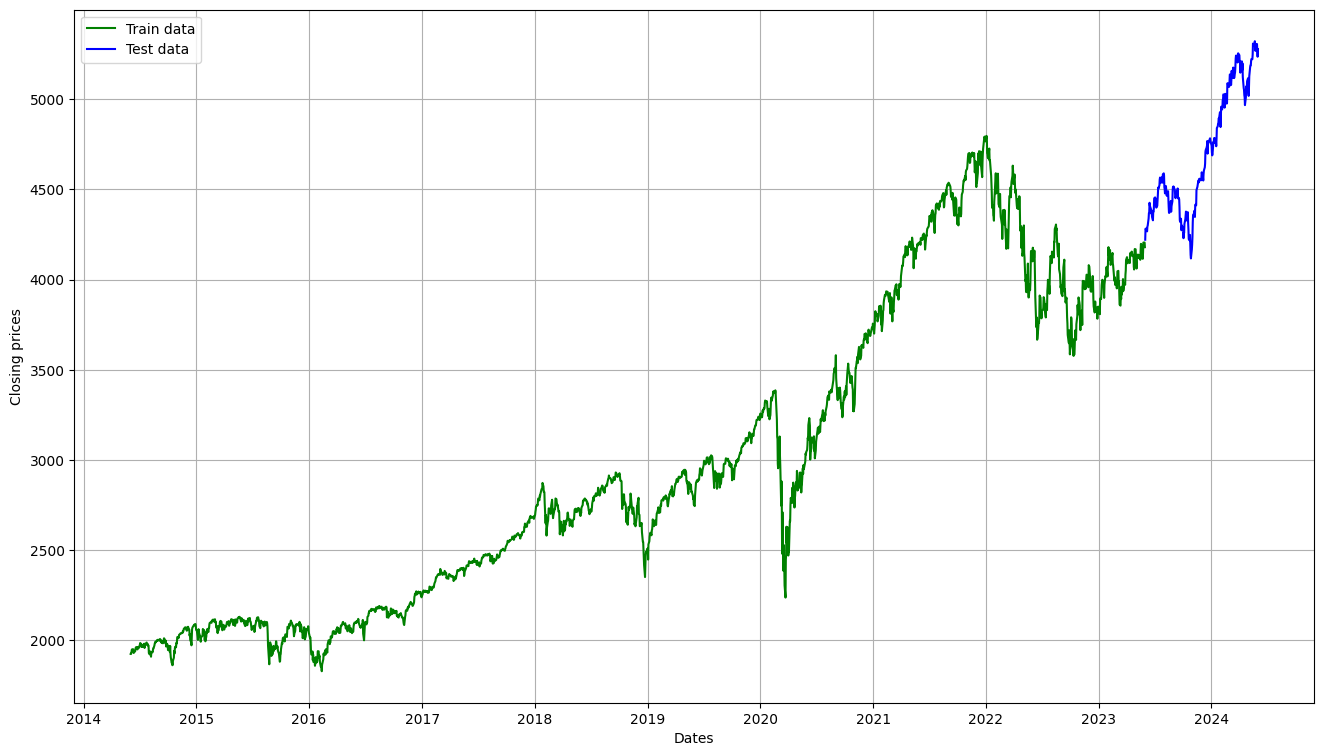

In [7]:
plt.figure(figsize=(16,9))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing prices')
plt.plot(df[0:to_row]['Adj Close'], 'green', label='Train data')
plt.plot(df[to_row:]['Adj Close'], 'blue', label='Test data')
plt.legend()
plt.show()

In [8]:
model_predictions = []
n_test_obser = len(testing_data)


 Initialize the list for storing predictions
model_predictions = []

 Fit the ARIMA model on the initial training data
model = ARIMA(training_data, order=(4,1,1))
model_fit = model.fit()

 Loop over the test set
for i in range(n_test_obser):
    # Forecast the next value
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    
    # Get the actual test value
    actual_test_value = testing_data[i]
    
    # Append the actual value to the training data
    training_data.append(actual_test_value)
    
    # Refit the model with the updated training data
    model = ARIMA(training_data, order=(4,1,1))
    model_fit = model.fit()

#Convert the model predictions to a numpy array for further analysis if needed
model_predictions = np.array(model_predictions)
    

In [9]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Assume training_data and testing_data are already defined
# and n_test_obser is the number of test observations
# Convert lists to numpy arrays if they are not already
training_data = np.array(training_data)
testing_data = np.array(testing_data)

# Initialize the list for storing predictions
model_predictions = []

# Fit the ARIMA model on the initial training data
model = ARIMA(training_data, order=(2, 1, 1))
model_fit = model.fit()

# Loop over the test set
for i in range(n_test_obser):
    # Forecast the next value
    output = model_fit.forecast(steps=1)
    yhat = output[0]
    model_predictions.append(yhat)
    
    # Get the actual test value
    actual_test_value = testing_data[i]
    
    # Append the actual value to the training data
    training_data = np.append(training_data, actual_test_value)
    
    # Refit the model with the updated training data
    model = ARIMA(training_data, order=(2, 1, 1))
    model_fit = model.fit()

# Convert the model predictions to a numpy array for further analysis if needed
model_predictions = np.array(model_predictions)

In [10]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2518
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -12557.094
Date:                Mon, 03 Jun 2024   AIC                          25122.189
Time:                        14:37:38   BIC                          25145.512
Sample:                             0   HQIC                         25130.654
                               - 2518                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1554      0.279     -0.557      0.578      -0.703       0.392
ar.L2          0.0300      0.028      1.066      0.287      -0.025       0.085
ma.L1          0.0698      0.278      0.251      0.8

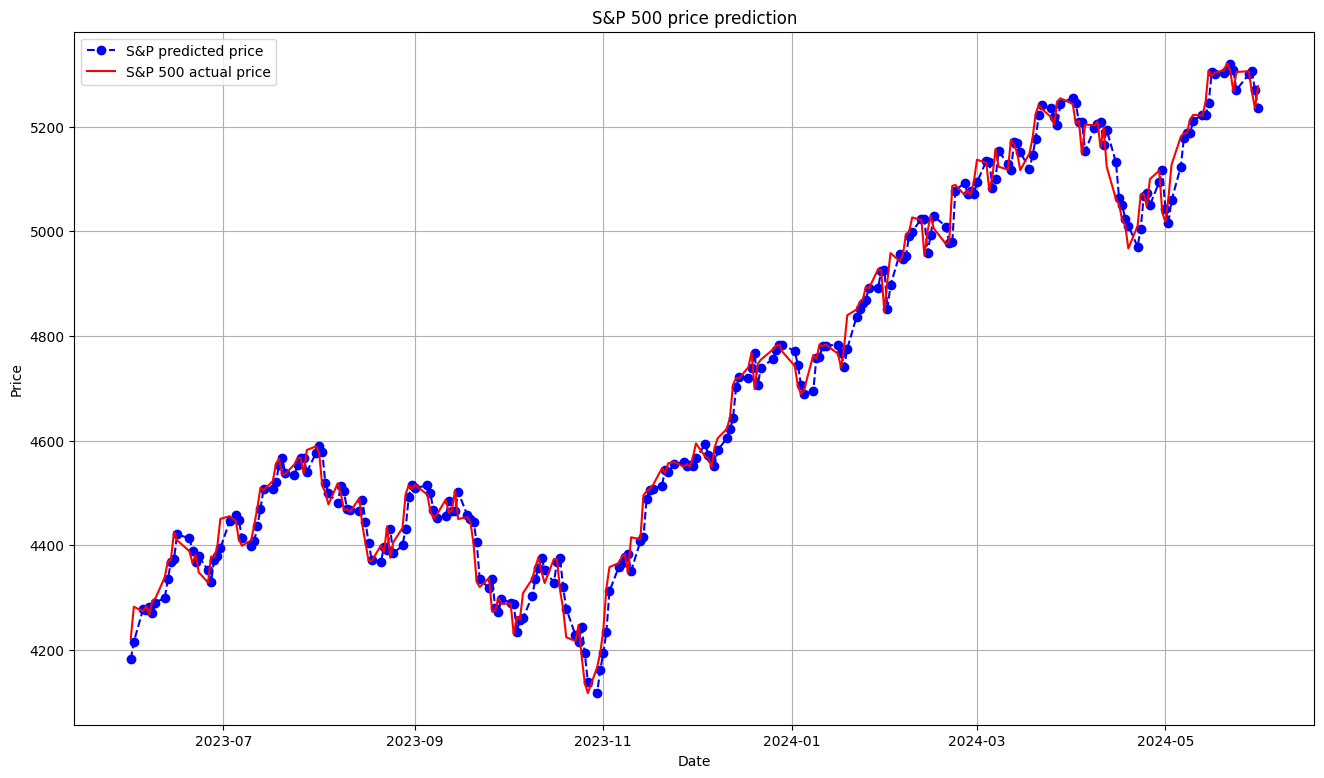

In [11]:
plt.figure(figsize=(16,9))
plt.grid(True)
date_range = df[to_row:].index
plt.plot(date_range, model_predictions, color = 'blue', marker = 'o', linestyle = 'dashed', label = 'S&P predicted price' )
plt.plot(date_range, testing_data, color = 'red', label = 'S&P 500 actual price' )
plt.title('S&P 500 price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [12]:
model_predictions

array([4182.28638419, 4215.77506333, 4278.08987577, 4277.18586905,
       4282.3564548 , 4269.60498745, 4290.56812315, 4299.54330467,
       4335.09293554, 4367.76505187, 4373.4617712 , 4420.67432101,
       4413.54548989, 4389.96431577, 4367.08980995, 4379.32254594,
       4352.41439533, 4329.24338479, 4372.70936864, 4379.19121246,
       4394.33153508, 4445.90729485, 4457.39403195, 4447.81978143,
       4414.67662221, 4398.681063  , 4408.0081931 , 4436.81526991,
       4470.20281517, 4507.72946041, 4507.4633338 , 4520.82111528,
       4552.62209019, 4566.05981103, 4538.27961124, 4534.83250637,
       4552.98378155, 4567.0033067 , 4567.34012649, 4540.20703907,
       4576.5875961 , 4590.29595223, 4578.12166192, 4519.01288849,
       4500.3147185 , 4479.97852196, 4513.5071253 , 4503.04403229,
       4469.86386113, 4467.41162714, 4464.63388107, 4487.01803843,
       4444.0289901 , 4405.29152976, 4372.3099363 , 4368.37313333,
       4396.92841363, 4390.01922965, 4430.72118624, 4384.27991

In [13]:
rmse = np.sqrt(mean_squared_error(model_predictions, testing_data))
rmse

34.326467329521535

In [14]:
model_predictions_2 = model_predictions[1:]

In [15]:
model_predictions_2

array([4215.77506333, 4278.08987577, 4277.18586905, 4282.3564548 ,
       4269.60498745, 4290.56812315, 4299.54330467, 4335.09293554,
       4367.76505187, 4373.4617712 , 4420.67432101, 4413.54548989,
       4389.96431577, 4367.08980995, 4379.32254594, 4352.41439533,
       4329.24338479, 4372.70936864, 4379.19121246, 4394.33153508,
       4445.90729485, 4457.39403195, 4447.81978143, 4414.67662221,
       4398.681063  , 4408.0081931 , 4436.81526991, 4470.20281517,
       4507.72946041, 4507.4633338 , 4520.82111528, 4552.62209019,
       4566.05981103, 4538.27961124, 4534.83250637, 4552.98378155,
       4567.0033067 , 4567.34012649, 4540.20703907, 4576.5875961 ,
       4590.29595223, 4578.12166192, 4519.01288849, 4500.3147185 ,
       4479.97852196, 4513.5071253 , 4503.04403229, 4469.86386113,
       4467.41162714, 4464.63388107, 4487.01803843, 4444.0289901 ,
       4405.29152976, 4372.3099363 , 4368.37313333, 4396.92841363,
       4390.01922965, 4430.72118624, 4384.27991364, 4400.07703

In [16]:
testing_data_2 = testing_data[1:]

In [17]:
rmse = np.sqrt(mean_squared_error(model_predictions_2, testing_data_2))
rmse

34.30777664059065